In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [6]:
df.shape

(3276, 10)

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df = df.fillna(df.mean())
print("✅ Missing values filled successfully.")
df.isnull().sum()


✅ Missing values filled successfully.


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.info()

In [ ]:
df.describe()

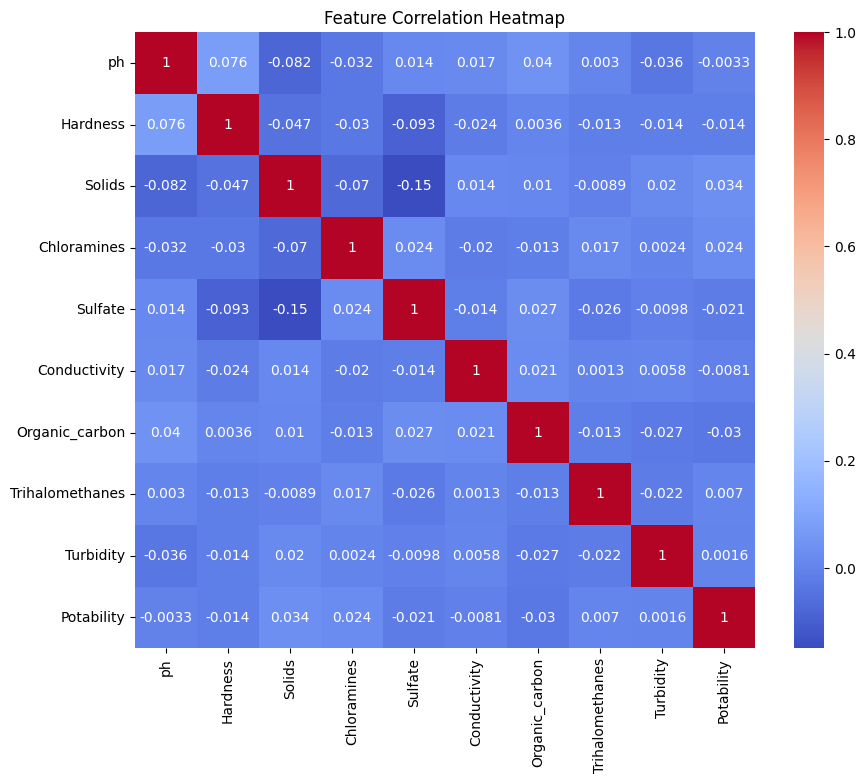

C:\Users\Sonam\AppData\Local\Temp\ipykernel_17048\4010361024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='Set2')


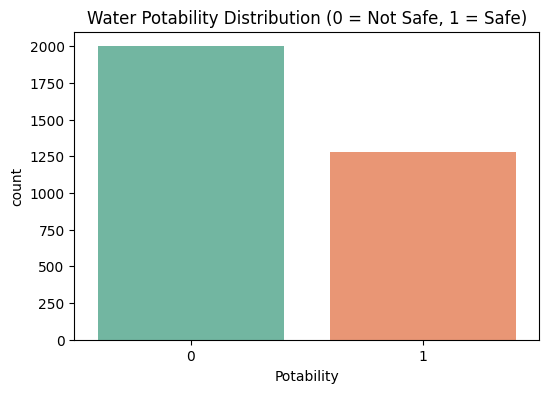

C:\Users\Sonam\AppData\Local\Temp\ipykernel_17048\4010361024.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y='ph', data=df, palette='cool')


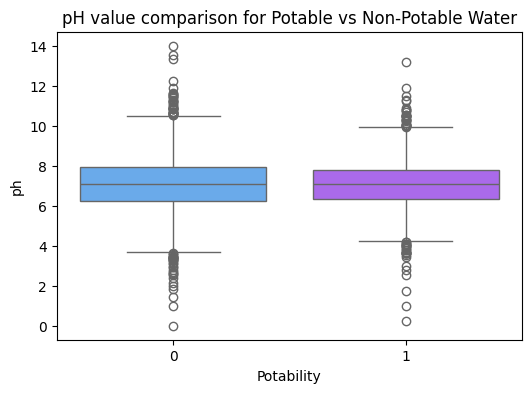

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Potability Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df, palette='Set2')
plt.title("Water Potability Distribution (0 = Not Safe, 1 = Safe)")
plt.show()

# Boxplot for pH values
plt.figure(figsize=(6,4))
sns.boxplot(x='Potability', y='ph', data=df, palette='cool')
plt.title("pH value comparison for Potable vs Non-Potable Water")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Model trained successfully!")
print("Accuracy:", accuracy_score(y_test, y_pred))


✅ Model trained successfully!
Accuracy: 0.5884146341463414


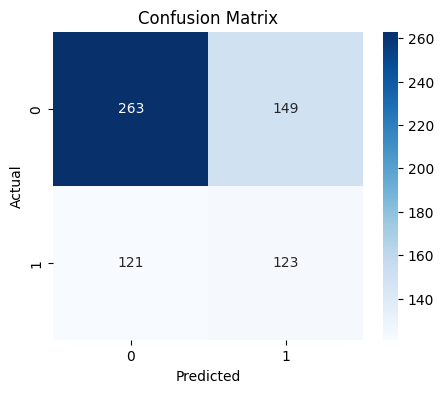

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       412
           1       0.45      0.50      0.48       244

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.59      0.59       656



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


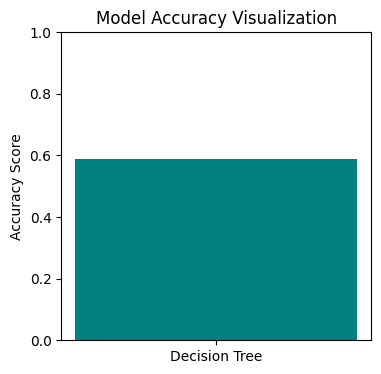

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.bar(["Decision Tree"], [accuracy], color="teal")
plt.title("Model Accuracy Visualization")
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.show()


In [13]:
print("Final Model Accuracy: {:.2f}%".format(accuracy*100))


Final Model Accuracy: 58.84%


In [ ]:
df['Sulfate'].mean()

In [ ]:
Project Title:
Water Quality Prediction using Machine Learning
📘 Abstract:
This project focuses on predicting the potability of water using machine learning.
It uses a dataset containing various water quality parameters such as pH, hardness, solids, chloramines, sulfate, conductivity, and organic carbon.
The Decision Tree Classifier model is trained on this data to classify water as “safe” (potable) or “unsafe” for drinking.
The final accuracy achieved is 58.84%.
⚙️ Modules Used:
pandas, numpy — data handling
matplotlib, seaborn — visualization
sklearn — model building and evaluation
🧮 Steps Followed:
Data Cleaning and Handling Missing Values
Exploratory Data Analysis (EDA)
Visualization using heatmaps and boxplots
Model Training using Decision Tree Classifier
Evaluation using accuracy, confusion matrix, and classification report
📊 Results:
Model Accuracy: 58.84%
The heatmap and boxplot showed correlations among attributes.
Confusion Matrix visualizes true vs predicted classifications.
✅ Conclusion:
This model successfully predicts water quality based on physicochemical properties.
Although the accuracy can be improved using advanced models like Random Forest or Gradient Boosting, this project demonstrates how ML can assist in environmental analysis and water safety prediction.

In [ ]:
df.fillna(df.mean(), inplace=True)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.Potability.value_counts()

In [ ]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

In [ ]:
sns.distplot(df['ph'])

In [ ]:
df.hist(figsize=(14,14))
plt.show()

In [ ]:
sns.pairplot(df,hue='Potability')

In [ ]:
sns.scatterplot(df['Hardness'],df['Solids'])

In [ ]:
sns.scatterplot(df['ph'],df['Potability'])

In [ ]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [ ]:
df.boxplot(figsize=(14,7))

In [ ]:
df['Solids'].describe()

# Partitioning

In [ ]:
X = df.drop('Potability',axis=1)

In [ ]:
Y= df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [ ]:
Y_train.value_counts()

In [ ]:
Y_test.value_counts()

# Normalization

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [ ]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Model Building

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

In [ ]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

In [ ]:
accuracy_score(prediction,Y_test)

In [ ]:
print("Feature importances:\n{}".format(dt.feature_importances_))

In [ ]:
confusion_matrix(prediction,Y_test)

# Prediction on only one set of data

In [ ]:
X_DT=dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [ ]:
X_DT

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,Y_train)

In [ ]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')

In [ ]:
confusion_matrix(prediction,Y_test)

# Hyperparameter Tuning / Model Optimization

# DT HPT

In [ ]:
dt.get_params().keys()

In [ ]:
#example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_search_dt.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(Y_test, y_pred2):
    print (classification_report(Y_test, y_pred2)) # print classification report
    return accuracy_score(Y_test, y_pred2) # return accuracy score

    
nested_score = cross_val_score(grid_search_dt, X=X_train, y=Y_train, cv=cv, 
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

In [ ]:
dt_y_predicted = grid_search_dt.predict(X_test)
dt_y_predicted

In [ ]:
grid_search_dt.best_params_

In [ ]:
dt_grid_score=accuracy_score(Y_test, dt_y_predicted)
dt_grid_score

In [ ]:
confusion_matrix(Y_test, dt_y_predicted)

# KNN HPT

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_search_knn.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_knn.best_score_:.3f} using {grid_search_knn.best_params_}")
means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
params = grid_search_knn.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(Y_test, y_pred2):
    print (classification_report(Y_test, y_pred2)) # print classification report
    return accuracy_score(Y_test, y_pred2) # return accuracy score

    
nested_score = cross_val_score(grid_search_knn, X=X_train, y=Y_train, cv=cv, 
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

In [ ]:
knn_y_predicted = grid_search_knn.predict(X_test)

In [ ]:
knn_y_predicted

In [ ]:
knn_grid_score=accuracy_score(Y_test, knn_y_predicted)

In [ ]:
knn_grid_score

In [ ]:
grid_search_knn.best_params_

In [ ]:
confusion_matrix(Y_test, knn_y_predicted)

# Prediction on only one set of data

In [ ]:
X_KNN=knn.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [ ]:
X_KNN